# Assignment 3: Classifiers, Object Recognition

### 1 CIFAR10 Classification using SVM and Random Forest (50 points)

In [1]:
# Paths to the datasets and other files
CIFAR10_path = "C:/Users/Kalvin/Documents/GitHub/ecse415/Ass3/cifar10"
A3_Q3_path = "C:/Users/Kalvin/Documents/GitHub/ecse415/Ass3/A3-W24-images"
Viola_Jones_path = "C:/Users/Kalvin/Documents/GitHub/ecse415/Ass3/"

In [2]:
# Installing packages
%pip install opencv-python
%pip install matplotlib
%pip install scikit-learn
%pip install scikit-image
%pip install tqdm


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Imports
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Use to see progress
from tqdm import tqdm



In [3]:
# Helper Method

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
# Load the data
x_train = []
y_train = []

for i in range(1,6):
    file = CIFAR10_path + "/data_batch_" + str(i)
    training_data = unpickle(f'{file}')

    X_train = training_data[b'data'] 
    Y_train = training_data[b'labels'] 
    
    y_train += Y_train

    # Transforming the RGB values into images
    for j in range(len(X_train)):
        x_train.append(X_train[j].reshape(3,32,32).transpose(1,2,0)) 

x_test = []
y_test = []

file = CIFAR10_path + "/test_batch"
testing_data = unpickle(f'{file}')

X_test = testing_data[b'data'] 
Y_test = testing_data[b'labels'] 

y_test += Y_test

# Transforming the RGB values into images
for j in range(len(X_test)):
    x_test.append(X_test[j].reshape(3,32,32).transpose(1,2,0)) 
    
# Transforming into np.array
X_train = np.array(x_train)
Y_train = np.array(y_train) 
X_test = np.array(x_test)
Y_test = np.array(y_test)
        

In [7]:
# Resizing images and grayscale
X_train = [cv2.resize(cv2.cvtColor(x, cv2.COLOR_BGR2GRAY), (64,64)) for x in X_train]
X_test = [cv2.resize(cv2.cvtColor(x, cv2.COLOR_BGR2GRAY), (64,64)) for x in X_test]

In [8]:
train_features = []
test_features = []

# Initialize HOG parameters
win_size = (64, 64)
block_size = (16, 16)  
block_stride = (8, 8)   
cell_size = (8, 8)
num_bins = 4

# Create HOG Descriptor object
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)

# Compute HOG features for train images
for img in tqdm(X_train):
    # Compute HOG features
    hog_features = hog.compute(img)
    train_features.append(hog_features.flatten())

# Compute HOG features for test images
for img in tqdm(X_test):
    # Compute HOG features
    hog_features = hog.compute(img)
    test_features.append(hog_features.flatten())

train_features = np.array(train_features)
test_features = np.array(test_features)

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:00<00:00, 11846.77it/s]


In [13]:
# Save/Load the features

# with open('train_features.npy', 'wb') as f:
#     np.save(f, train_features)
# with open('test_features.npy', 'wb') as f:
#     np.save(f, test_features)

# train_features = np.load('/kaggle/input/models-and-features/train_features.npy')
# test_features = np.load('/kaggle/input/models-and-features/test_features.npy')

In [8]:
# Setting up the SVM classifier
svm_classifier = svm.SVC()
svm_classifier.fit(train_features, Y_train)

# Save/Load the model 
# with open('/kaggle/input/models-and-features/svm_classifier (1).pkl', 'rb') as f:
#     svm_classifier = pickle.load(f)
# with open('svm_classifier.pkl', 'wb') as f:
#     pickle.dump(svm_classifier, f)

SVC()

In [9]:
# Predicting the test set
y_pred = svm_classifier.predict(test_features)
accuracy = accuracy_score(Y_test, y_pred)
# output the accuracy
accuracy

0.6527

Note: For the hypertuning, due to time constraints, the training set is reduced to 10000 and the testing set is of size 1000. This allowed the grid search model to run for 50 minutes instead of a projected runtime of 6 hours and 40 minutes. However, I am aware that 

In [16]:
# Grid Search for SVM
# import joblib
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_features[:10000], Y_train[:10000])

# Save grid search model
# joblib.dump(grid_search, 'model_file_name.pkl')
 
# print best parameter after tuning 
print(grid_search.best_params_) 
grid_predictions = grid_search.predict(test_features[:1000]) 
   
# print classification report 
print(classification_report(Y_test[:1000], grid_predictions)) 

{'C': 10, 'gamma': 0.1}
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       103
           1       0.70      0.69      0.69        89
           2       0.50      0.46      0.48       100
           3       0.46      0.41      0.43       103
           4       0.46      0.51      0.49        90
           5       0.40      0.40      0.40        86
           6       0.63      0.62      0.62       112
           7       0.63      0.65      0.64       102
           8       0.66      0.73      0.69       106
           9       0.70      0.63      0.66       109

    accuracy                           0.57      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.57      0.57      0.57      1000



In [11]:
# Setting up the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=5, criterion='entropy')
rf_classifier.fit(train_features, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [15]:
# Predict labels for test data
y_pred_rf = rf_classifier.predict(test_features)
# Calculate classification accuracy
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
accuracy_rf

0.3173

In [9]:
# Experimenting with the SVM and the Random Forest random state

random_states = [10, 20, 30]

# Initialize lists to store performance metrics for each model
svm_scores = []
rf_scores = []

# Iterate over different random states
for random_state in tqdm(random_states):
    # Train Support Vector Machine classifier
    svm_classifier = svm.SVC(C=10, gamma=0.1, random_state=random_state)
    svm_classifier.fit(train_features, y_train)
    svm_pred = svm_classifier.predict(test_features)
    svm_accuracy = accuracy_score(y_test, svm_pred)
    svm_scores.append(svm_accuracy)

    # Train Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=5, criterion='entropy', random_state=random_state)
    rf_classifier.fit(train_features, y_train)
    rf_pred = rf_classifier.predict(test_features)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_scores.append(rf_accuracy)

# Print the performance metrics for each random state
print("SVM Scores:", svm_scores)
print("RF Scores:", rf_scores)

# Calculate and print the mean and standard deviation of scores for each model
print("Mean SVM Score:", np.mean(svm_scores), "Standard Deviation:", np.std(svm_scores))
print("Mean RF Score:", np.mean(rf_scores), "Standard Deviation:", np.std(rf_scores))

100%|██████████| 3/3 [1:51:07<00:00, 2222.63s/it]

SVM Scores: [0.6527, 0.6527, 0.6527]
RF Scores: [0.32, 0.3236, 0.3248]
Mean SVM Score: 0.6527 Standard Deviation: 0.0
Mean RF Score: 0.3228 Standard Deviation: 0.0020396078054371034


#### Comparison SVM vs RF
It is possible to see that the SVM has a higher accuracy rate compared to the RF. Furthermore, when running the two models with different random states, the SVM model does not deviate and keeps the same accuracy of 65.27% while the RF model has a fairly small deviation of 0.2%.

#### Strengths and weaknesses
Support Vector Machines (SVM) are renowned for their effectiveness in high-dimensional spaces and their versatility attributed to the availability of different kernel functions for defining decision boundaries. They excel particularly in scenarios where the number of dimensions exceeds the number of samples, demonstrating robust performance in such cases. However, SVMs can be computationally intensive, particularly when handling large datasets, making them less practical for such scenarios. Additionally, their performance is highly sensitive to the choice of kernel and regularization parameters, necessitating careful tuning. Consequently, SVMs may not be suitable for large datasets due to their high training time complexity.

On the other hand, Random Forest (RF) classifiers offer distinct advantages, including their ability to handle large datasets with high dimensionality while being less susceptible to overfitting compared to decision trees. RF models demonstrate robustness to outliers and noisy data, and they do not require feature scaling, simplifying the preprocessing steps. Nevertheless, RF models often lack interpretability compared to decision trees, which can limit their utility in certain contexts. Moreover, they may struggle with imbalanced datasets and can exhibit slow training times, especially when constructing very large forests. Despite these limitations, RF classifiers remain a popular choice due to their overall effectiveness in various machine learning tasks.

### 2 Face Detection (50 points)

In [3]:
# Loading images
import glob # used to read multiple files

images = [cv2.imread(file) for file in glob.glob(A3_Q3_path + "/Q2 part1/*.jpg")]
images = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in images]

images = np.array(images)
images = images.astype('float64')
height, width = images[0].shape

for i in range(5):
    plt.subplot(1,5,i+1), plt.imshow(images[i], cmap = 'gray')
    plt.xticks([]), plt.yticks([])    


In [4]:
# Converting into 3d to 2d
images_vec = [i.flatten() for i in images]
images_vec = np.array(images_vec)
images_vec = images_vec.transpose()

In [5]:
# Normalizing data
image_mean = images_vec.mean(axis=1)
norm_images = images_vec - image_mean.reshape(images_vec.shape[0], 1)
# Finding covariance matrix
cov_mat = np.cov(np.transpose(norm_images))

In [6]:
# Computing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

# Sorting eigenvalues and eigenvectors
order_of_importance = np.argsort(eigenvalues)[::-1] 
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance]

In [7]:
best_eigen_vectors = sorted_eigenvectors[0:5, :]

# Converting to higher dimension 
eigen_faces = best_eigen_vectors.dot(np.transpose(norm_images))
weights = np.transpose(norm_images).dot(np.transpose(eigen_faces)) 

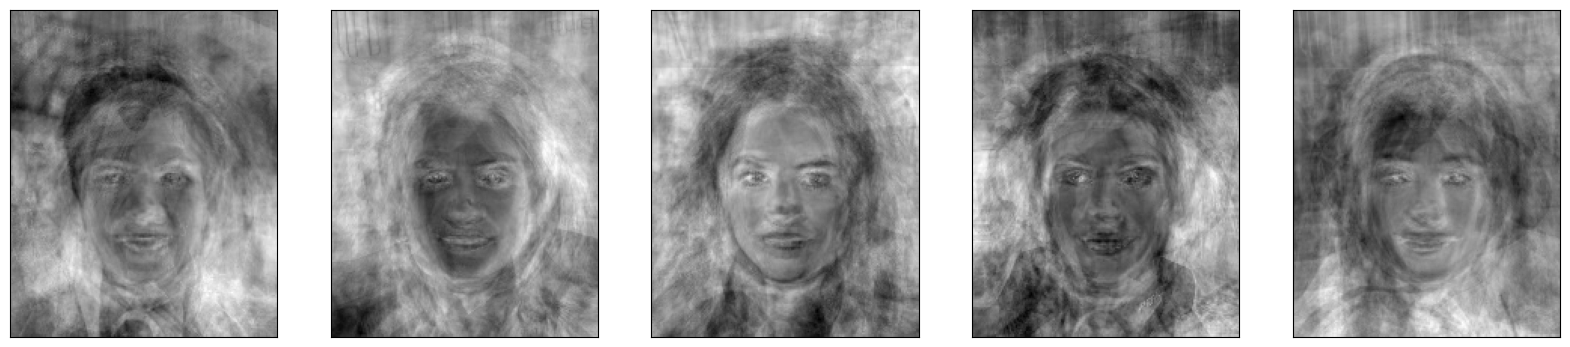

In [8]:
# Displaying the 5 first eigenfaces

eigen_disp = []
for i in range(5):
    img = eigen_faces[i]
    img = img.reshape(height, width)
    eigen_disp.append(img)

    
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(1,5,i+1), plt.imshow(eigen_disp[i], cmap = 'gray')
    plt.xticks([]), plt.yticks([])
    
plt.show()

In [9]:
# Use a sliding window method to detect faces in the image2, which is named Person.png
# under folder Q2 part2. Use the result from the previous step to compute the distance in the
# eignspace between the window contents and your training data.

img_path = A3_Q3_path + "/Q2 part2/Person.png"
img_with_peoples = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) 

plt.imshow(img_with_peoples)
plt.title("Person.png"), plt.xticks([]), plt.yticks([])
plt.show()
    

In [11]:
# Sliding window method
def sliding_window(img, thres, window=(500, 650), step=16):
    distances_stored = []
    faces_detected = []
    img_out = img.copy()
    for y in range(0, img.shape[0] - window[1] + 1, step):
        for x in range(0, img.shape[1] - window[0] + 1, step):
            img_window = img[y:y+window[1], x:x+window[0]] # Extracting the window
            img_window_resized = cv2.resize(img_window, (width, height), interpolation=cv2.INTER_AREA) 
            img_window_resized = img_window_resized.astype('float64')
            img_window_flat = img_window_resized.flatten()
            norm_image = img_window_flat - image_mean # Normalizing the window
            weight = np.transpose(norm_image).dot(np.transpose(eigen_faces))
            norm_distances = np.linalg.norm(weights - weight, axis=1)
            min_distance = np.min(norm_distances)
            distances_stored.append(min_distance)

            if min_distance < thres:
                img_out = cv2.rectangle(img_out, (x,y), (x+window[0], y+window[1]), (0,0,0), 3)
                faces_detected.append(img_window_resized)
                x+=window[0]

    print("Max distance: " + str(max(distances_stored)) + " and Min distance: " + str(min(distances_stored)))
    plt.imshow(img_out, cmap='gray')
    plt.title("Detected peoples with threshold: "+ str(thres)), plt.xticks([]), plt.yticks([])
    plt.show()

    if faces_detected:
        plt.figure(figsize=(20, 10))
        for i in range(min(len(faces_detected), 30)):
            plt.subplot(3, 10, i+1), plt.imshow(faces_detected[i], cmap='gray')
            plt.title("Person " + str(i+1))
            plt.xticks([]), plt.yticks([])
        plt.show()

Max distance: 122475962.10723312 and Min distance: 3195267.5671125865


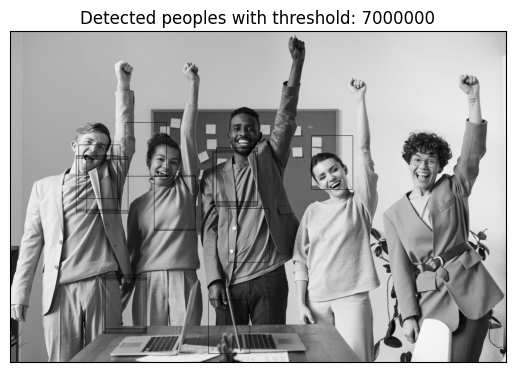

In [12]:
img_with_peoples_gray = cv2.cvtColor(img_with_peoples, cv2.COLOR_BGR2GRAY) 
sliding_window(img_with_peoples_gray, 7000000)


Max distance: 122475962.10723312 and Min distance: 3195267.5671125865


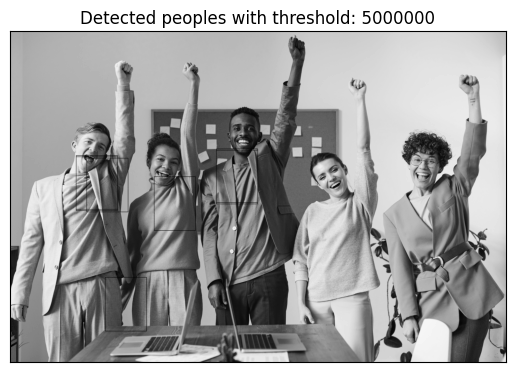

Max distance: 122475962.10723312 and Min distance: 3195267.5671125865


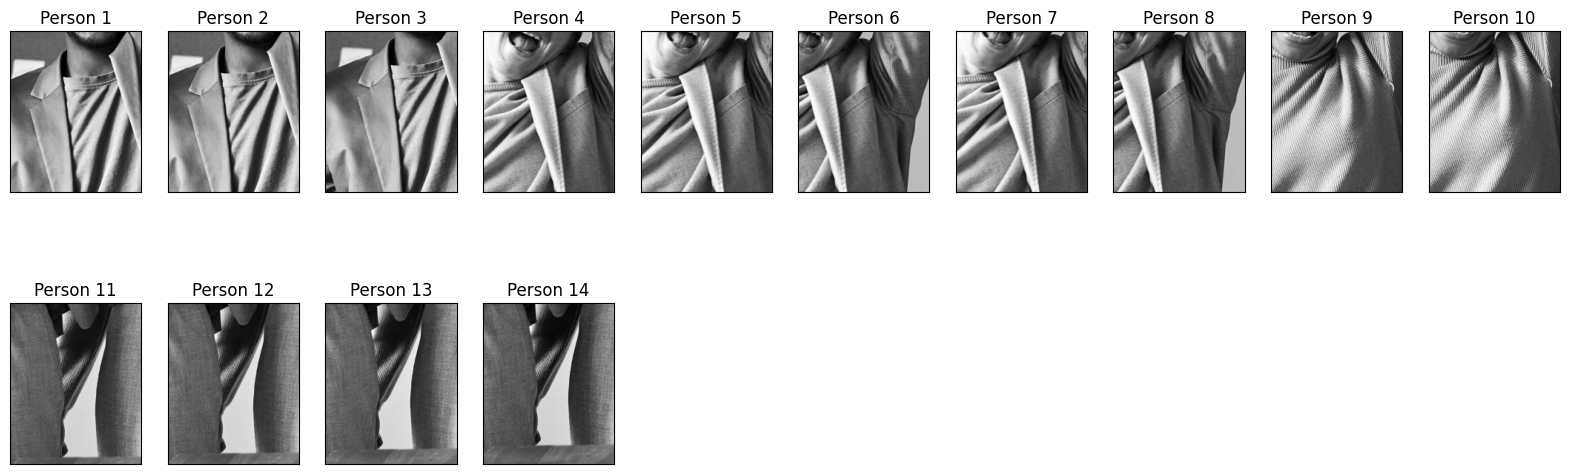

Max distance: 122475962.10723312 and Min distance: 3195267.5671125865


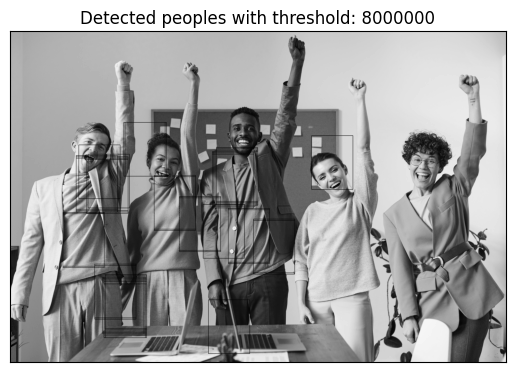

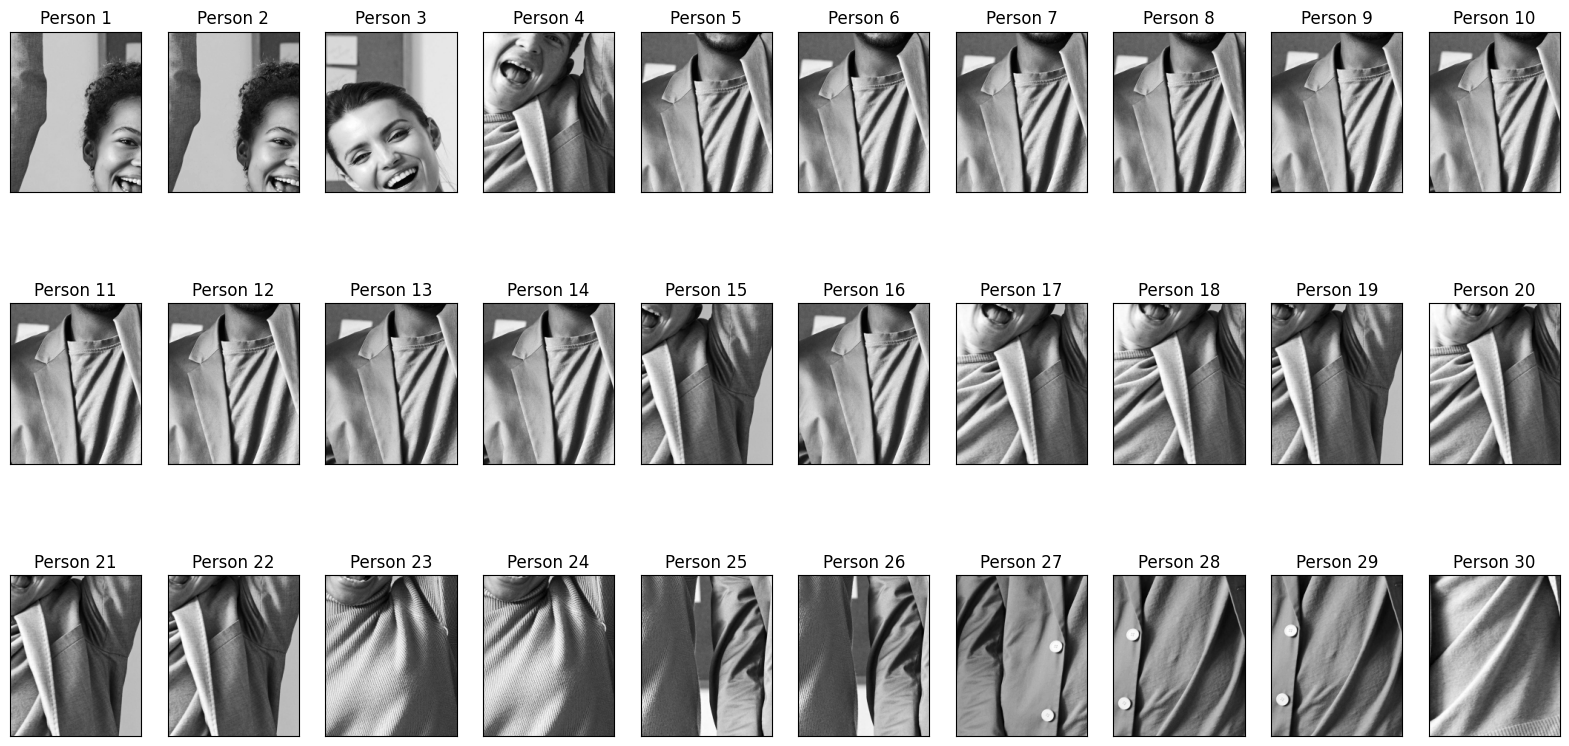

In [13]:
sliding_window(img_with_peoples_gray, 5000000)
sliding_window(img_with_peoples_gray, 6000000)
sliding_window(img_with_peoples_gray, 8000000)

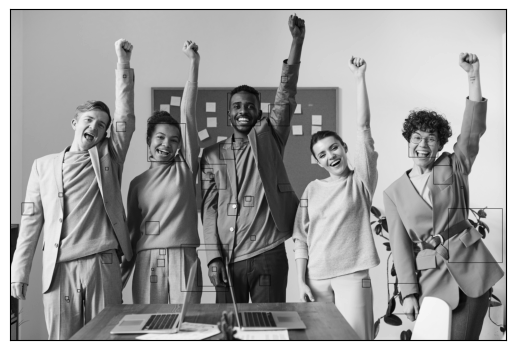

In [39]:
# Taken from Tutorial 5
gray = img_with_peoples_gray.copy()
face_cascade = cv2.CascadeClassifier(Viola_Jones_path +'/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 2)

for (x,y,w,h) in faces:
    gray = cv2.rectangle(gray,(x,y),(x+w,y+h),(0,0,0),4)

plt.imshow(gray, cmap="gray")
plt.xticks(())
plt.yticks(())
plt.show()

#### 2.7
It is possible to see that the Viola-Jones face detector detects 3 faces out 5. It, also, detected multiple false positives like wrinkles of a clothes or the hand of certain people. On the other hand, my implementation of the face detector could only partially detect 3 faces and due to the use of a sliding window, this implementation picked up a lot of false positives and duplicates. 

#### 2.8
The Viola-Jones detector, renowned for its effectiveness in object detection, particularly faces, relies on Haar-like features and a cascaded classifier to rapidly identify regions of interest in images. It excels when objects possess discernible features or patterns that can be captured by its predefined templates, making it adept at detecting objects under varying conditions. 

Conversely, PCA serves as a dimensionality reduction technique, transforming high-dimensional data into a lower-dimensional space while retaining the most important information. It finds utility in tasks such as feature extraction and data compression but may struggle in scenarios where the underlying structure of the data is not well-suited for linear transformation. 

In essence, Viola-Jones thrives in detecting objects with distinctive features, while PCA excels in uncovering underlying data structure, underscoring the complementary roles they play in the realm of computer vision.

#### 2.9
First, Haar-like features are simple rectangular filters that are used to identify specific patterns in an image. These features can represent edges, lines, and textures in the image. The Viola-Jones algorithm uses a set of predefined Haar-like features to scan the image at different scales and locations.

Second, to speed up the computation of Haar-like features, the integral image representation is used. The integral image allows for the efficient calculation of the sum of pixel values within any rectangular region of the image.

Third, the AdaBoost algorithm is used to select a small set of highly discriminative features from a larger set of Haar-like features. During training, AdaBoost assigns weights to each training sample and selects the best features that minimize classification error. It iteratively trains weak classifiers (simple decision rules based on single features) and combines them into a strong classifier.

Fourth, the final model is organized as a cascade of classifiers, where each stage consists of multiple weak classifiers. The cascade is designed to quickly reject regions of the image that are unlikely to contain the object being detected (e.g., faces). As the image is scanned, regions that do not pass a stage of the cascade are immediately discarded, reducing the computational load.

Finally, after the cascade of classifiers identifies potential object regions, non-maximum suppression is applied to eliminate duplicate detections and refine the bounding boxes around detected objects.